In [24]:
from lsst.ip.isr.isrTask import IsrTask

from lsst.daf.butler import Butler
import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage
import matplotlib.pyplot as plt
import numpy
from astropy.table import Table

In [2]:
   def display(exposure,title=None,frame=0):
    afw_display = afwDisplay.Display(frame=frame, backend='matplotlib')
    afw_display.scale('asinh', 'zscale')
    afw_display.setMaskTransparency(90)
    afw_display.mtv(exposure.getMaskedImage())
    
    maskPlaneDict = exposure.getMask().getMaskPlaneDict()
    maskKeyColorList = []
    for k in maskPlaneDict.keys():
        if afw_display.getMaskPlaneColor(k) is not None:
            maskKeyColorList.append(k + ":" + afw_display.getMaskPlaneColor(k))
    print(maskKeyColorList)
    plt.title(title)

In [3]:
repo_path = "embargo_new"
butler = Butler(repo_path,collections=['LSSTCam/photodiode','LSSTCam/raw/all'],instrument='LSSTCam')
registry = butler.registry

In [4]:
sensor="R01_S01"
detector=list(registry.queryDimensionRecords("detector",instrument='LSSTCam',where=f"detector.full_name='{sensor}'"))[0].id
detector

1

In [5]:
dataid=list(registry.queryDimensionRecords('exposure',where="day_obs = 20240909"))[:10]

dataid=list(registry.queryDimensionRecords('exposure',where="exposure.obs_id = 'MC_C_20240909_000012'"))[:10]
dataid

[exposure.RecordClass(instrument='LSSTCam', id=2024090900012, day_obs=20240909, group='2024090900012', physical_filter='unknown', obs_id='MC_C_20240909_000012', exposure_time=15.0, dark_time=15.0898, observation_type='dark', observation_reason='dark', seq_num=12, seq_start=12, seq_end=12, target_name='UNKNOWN', science_program='unknown', tracking_ra=None, tracking_dec=None, sky_angle=None, azimuth=None, zenith_angle=None, has_simulated=False, can_see_sky=False, timespan=Timespan(begin=astropy.time.Time('2024-09-09 18:03:14.441995', scale='tai', format='iso'), end=astropy.time.Time('2024-09-09 18:03:29.532000', scale='tai', format='iso')))]

In [6]:
img = butler.get('raw',dataId=dataid[-1].dataId,detector=detector)

<frozen _collections_abc>:860: FutureWarning: Call to deprecated method __iter__. (Using DataCoordinate as a Mapping is deprecated in favor of the .mapping and .required attributes, and will be dropped after v27.) -- Deprecated since version v27.
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-8.0.0/Linux64/daf_butler/gb745877958+0176e2a6b4/python/lsst/daf/butler/dimensions/_coordinate.py:548: FutureWarning: Call to deprecated method keys. (Using DataCoordinate as a Mapping is deprecated in favor of the .mapping and .required attributes, and will be dropped after v27.) -- Deprecated since version v27.
  return iter(self.keys())
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-8.0.0/Linux64/daf_butler/gb745877958+0176e2a6b4/python/lsst/daf/butler/dimensions/_coordinate.py:568: FutureWarning: Call to deprecated function (or staticmethod) graph. (DataCoordinate.graph is deprecated in favor of .dimensions, and will be dropped after v27.) -- Deprecated since version v27.
  return s

In [7]:
isr=IsrTask()
isr.config.doBias=False
isr.config.doLinearize=False
isr.config.doDark=False
isr.config.doFlat=False
isr.config.doDefect=False

In [8]:
isred = isr.run(img)

In [9]:
numpy.mean(isred.exposure.getImage().array/img.metadata['EXPTIME']) 

0.15762188

['BAD:red', 'CR:magenta', 'DETECTED:blue', 'DETECTED_NEGATIVE:cyan', 'EDGE:yellow', 'INTRP:green', 'NO_DATA:orange', 'SAT:green', 'SUSPECT:yellow', 'UNMASKEDNAN:red']


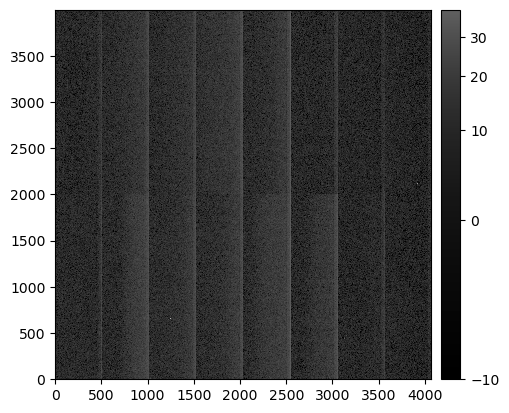

In [10]:
display(isred.exposure)

In [22]:
table = []
for dataid in list(registry.queryDimensionRecords('exposure',where="day_obs = 20240909 and exposure.observation_type != 'bias' " )):
    print(dataid.dataId)
    try:
        img = butler.get('raw',dataId=dataid.dataId,detector=detector)
    
        isr=IsrTask()
        isr.config.doBias=False
        isr.config.doLinearize=False
        isr.config.doDark=False
        isr.config.doFlat=False
        isr.config.doDefect=False
    
        isred = isr.run(img)
    
        table.append({ 'obs_id': dataid.obs_id, 
                 'meancount/sec': numpy.mean(isred.exposure.getImage().array/img.metadata['EXPTIME'])
                })
    except:
        pass



{instrument: 'LSSTCam', exposure: 2024090900003}
{instrument: 'LSSTCam', exposure: 2024090900005}
{instrument: 'LSSTCam', exposure: 2024090900006}


<frozen _collections_abc>:860: FutureWarning: Call to deprecated method __iter__. (Using DataCoordinate as a Mapping is deprecated in favor of the .mapping and .required attributes, and will be dropped after v27.) -- Deprecated since version v27.
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-8.0.0/Linux64/daf_butler/gb745877958+0176e2a6b4/python/lsst/daf/butler/dimensions/_coordinate.py:548: FutureWarning: Call to deprecated method keys. (Using DataCoordinate as a Mapping is deprecated in favor of the .mapping and .required attributes, and will be dropped after v27.) -- Deprecated since version v27.
  return iter(self.keys())
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-8.0.0/Linux64/daf_butler/gb745877958+0176e2a6b4/python/lsst/daf/butler/dimensions/_coordinate.py:568: FutureWarning: Call to deprecated function (or staticmethod) graph. (DataCoordinate.graph is deprecated in favor of .dimensions, and will be dropped after v27.) -- Deprecated since version v27.
  return s

{instrument: 'LSSTCam', exposure: 2024090900012}


<frozen _collections_abc>:860: FutureWarning: Call to deprecated method __iter__. (Using DataCoordinate as a Mapping is deprecated in favor of the .mapping and .required attributes, and will be dropped after v27.) -- Deprecated since version v27.
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-8.0.0/Linux64/daf_butler/gb745877958+0176e2a6b4/python/lsst/daf/butler/dimensions/_coordinate.py:548: FutureWarning: Call to deprecated method keys. (Using DataCoordinate as a Mapping is deprecated in favor of the .mapping and .required attributes, and will be dropped after v27.) -- Deprecated since version v27.
  return iter(self.keys())
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-8.0.0/Linux64/daf_butler/gb745877958+0176e2a6b4/python/lsst/daf/butler/dimensions/_coordinate.py:568: FutureWarning: Call to deprecated function (or staticmethod) graph. (DataCoordinate.graph is deprecated in favor of .dimensions, and will be dropped after v27.) -- Deprecated since version v27.
  return s

{instrument: 'LSSTCam', exposure: 2024090900014}


<frozen _collections_abc>:860: FutureWarning: Call to deprecated method __iter__. (Using DataCoordinate as a Mapping is deprecated in favor of the .mapping and .required attributes, and will be dropped after v27.) -- Deprecated since version v27.
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-8.0.0/Linux64/daf_butler/gb745877958+0176e2a6b4/python/lsst/daf/butler/dimensions/_coordinate.py:548: FutureWarning: Call to deprecated method keys. (Using DataCoordinate as a Mapping is deprecated in favor of the .mapping and .required attributes, and will be dropped after v27.) -- Deprecated since version v27.
  return iter(self.keys())
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-8.0.0/Linux64/daf_butler/gb745877958+0176e2a6b4/python/lsst/daf/butler/dimensions/_coordinate.py:568: FutureWarning: Call to deprecated function (or staticmethod) graph. (DataCoordinate.graph is deprecated in favor of .dimensions, and will be dropped after v27.) -- Deprecated since version v27.
  return s

{instrument: 'LSSTCam', exposure: 2024090900008}


<frozen _collections_abc>:860: FutureWarning: Call to deprecated method __iter__. (Using DataCoordinate as a Mapping is deprecated in favor of the .mapping and .required attributes, and will be dropped after v27.) -- Deprecated since version v27.
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-8.0.0/Linux64/daf_butler/gb745877958+0176e2a6b4/python/lsst/daf/butler/dimensions/_coordinate.py:548: FutureWarning: Call to deprecated method keys. (Using DataCoordinate as a Mapping is deprecated in favor of the .mapping and .required attributes, and will be dropped after v27.) -- Deprecated since version v27.
  return iter(self.keys())
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-8.0.0/Linux64/daf_butler/gb745877958+0176e2a6b4/python/lsst/daf/butler/dimensions/_coordinate.py:568: FutureWarning: Call to deprecated function (or staticmethod) graph. (DataCoordinate.graph is deprecated in favor of .dimensions, and will be dropped after v27.) -- Deprecated since version v27.
  return s

{instrument: 'LSSTCam', exposure: 2024090900010}


<frozen _collections_abc>:860: FutureWarning: Call to deprecated method __iter__. (Using DataCoordinate as a Mapping is deprecated in favor of the .mapping and .required attributes, and will be dropped after v27.) -- Deprecated since version v27.
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-8.0.0/Linux64/daf_butler/gb745877958+0176e2a6b4/python/lsst/daf/butler/dimensions/_coordinate.py:548: FutureWarning: Call to deprecated method keys. (Using DataCoordinate as a Mapping is deprecated in favor of the .mapping and .required attributes, and will be dropped after v27.) -- Deprecated since version v27.
  return iter(self.keys())
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-8.0.0/Linux64/daf_butler/gb745877958+0176e2a6b4/python/lsst/daf/butler/dimensions/_coordinate.py:568: FutureWarning: Call to deprecated function (or staticmethod) graph. (DataCoordinate.graph is deprecated in favor of .dimensions, and will be dropped after v27.) -- Deprecated since version v27.
  return s

{instrument: 'LSSTCam', exposure: 2024090900016}


<frozen _collections_abc>:860: FutureWarning: Call to deprecated method __iter__. (Using DataCoordinate as a Mapping is deprecated in favor of the .mapping and .required attributes, and will be dropped after v27.) -- Deprecated since version v27.
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-8.0.0/Linux64/daf_butler/gb745877958+0176e2a6b4/python/lsst/daf/butler/dimensions/_coordinate.py:548: FutureWarning: Call to deprecated method keys. (Using DataCoordinate as a Mapping is deprecated in favor of the .mapping and .required attributes, and will be dropped after v27.) -- Deprecated since version v27.
  return iter(self.keys())
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-8.0.0/Linux64/daf_butler/gb745877958+0176e2a6b4/python/lsst/daf/butler/dimensions/_coordinate.py:568: FutureWarning: Call to deprecated function (or staticmethod) graph. (DataCoordinate.graph is deprecated in favor of .dimensions, and will be dropped after v27.) -- Deprecated since version v27.
  return s

{instrument: 'LSSTCam', exposure: 2024090900018}


<frozen _collections_abc>:860: FutureWarning: Call to deprecated method __iter__. (Using DataCoordinate as a Mapping is deprecated in favor of the .mapping and .required attributes, and will be dropped after v27.) -- Deprecated since version v27.
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-8.0.0/Linux64/daf_butler/gb745877958+0176e2a6b4/python/lsst/daf/butler/dimensions/_coordinate.py:548: FutureWarning: Call to deprecated method keys. (Using DataCoordinate as a Mapping is deprecated in favor of the .mapping and .required attributes, and will be dropped after v27.) -- Deprecated since version v27.
  return iter(self.keys())
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-8.0.0/Linux64/daf_butler/gb745877958+0176e2a6b4/python/lsst/daf/butler/dimensions/_coordinate.py:568: FutureWarning: Call to deprecated function (or staticmethod) graph. (DataCoordinate.graph is deprecated in favor of .dimensions, and will be dropped after v27.) -- Deprecated since version v27.
  return s

[{'obs_id': 'MC_C_20240909_000006', 'meancount/sec': 0.46067682},
 {'obs_id': 'MC_C_20240909_000008', 'meancount/sec': 0.47597194},
 {'obs_id': 'MC_C_20240909_000010', 'meancount/sec': 0.23685321},
 {'obs_id': 'MC_C_20240909_000012', 'meancount/sec': 0.15762188},
 {'obs_id': 'MC_C_20240909_000014', 'meancount/sec': 0.43902317},
 {'obs_id': 'MC_C_20240909_000016', 'meancount/sec': 0.22366054},
 {'obs_id': 'MC_C_20240909_000018', 'meancount/sec': 0.1580315}]

In [23]:
Table(sorted(table,key=lambda x: x["obs_id"]))

NameError: name 'Table' is not defined